1. Setup 

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns

2. Get the data

In [7]:


df = pd.read_csv("datasets/MergeConflictsDataset.csv", sep = ';')
df.head()



,commit,parent1,parent2,ancestor,is pr,added lines,deleted lines,devs parent1,devs parent2,time,...,add,remove,use,delete,change,messages_min,messages_max,messages_mean,messages_median,conflict
0,efc0bcd1d6199448c323549fdc45310750b48c85,fb9f2a65cabba5a924b89a45793914066471b2ab,5ee7c7c750e9ecffaea12f97d5b05b2445e7c007,fb9f2a65cabba5a924b89a45793914066471b2ab,1,5,0,0,1,23,...,0,0,0,0,0,20,65,35.40000,20.0,0
1,287b9b838b6b6b212ef538aa537aef76110ee111,72fd7d81c9c7e28af8740f5a1b210a803290383d,fb9f2a65cabba5a924b89a45793914066471b2ab,a18c1088c892f1e6ed4b7d541e68b2e4b039a42e,0,1166,11267,1,2,371,...,0,0,0,0,0,31,117,58.56383,53.5,1
2,e7478680c0db825239ea9628967728c8577bb5c2,36977963caa2896ad9a4a92b2bdcd85189beccb1,bc230857adc3a9763bc7d89793d826463c857c00,36977963caa2896ad9a4a92b2bdcd85189beccb1,1,0,0,0,1,22,...,0,0,0,0,0,18,18,18.00000,18.0,0
3,0c65b30a8fd3a7db40163fcb9b0004cb7487c0ff,419e6d2d9fb91f2d9cdbdd1161a6c7ecc329363f,877c43f8242b88447d0234400c6e9b5c7586b558,fe29962932a8e34f0c3ac5cd795cd40090c9fabd,1,0,0,2,1,24,...,0,0,0,0,0,22,63,38.80000,31.0,0
4,419e6d2d9fb91f2d9cdbdd1161a6c7ecc329363f,7899f565d3461ed287e61662c8d399aafcac9e42,5e68e04e310c4f57a19d4cfa6be1e0ba3a8801d6,236b85af833398e0f07d08b7d7a25734d8c1b11d,0,0,0,1,2,2,...,0,0,0,0,0,31,56,43.50000,43.5,1


3. Discover and visualize the data to gain insights

In [8]:
df.describe()

,is pr,added lines,deleted lines,devs parent1,devs parent2,time,nr files,added files,deleted files,renamed files,...,add,remove,use,delete,change,messages_min,messages_max,messages_mean,messages_median,conflict
count,26973.000000,2.697300e+04,2.697300e+04,26973.000000,26973.000000,26973.000000,26973.000000,26973.000000,26973.000000,26973.000000,...,26973.000000,26973.000000,26973.000000,26973.000000,26973.000000,26973.000000,26973.000000,26973.000000,26973.000000,26973.000000
mean,0.777741,4.255746e+02,2.504278e+02,4.656175,1.911801,240.714159,0.752048,2.431061,1.396545,0.970229,...,4.316205,0.955437,1.338857,0.096281,1.007860,51.391280,104.662551,69.455646,68.021095,0.054425
std,0.415772,8.887706e+03,1.027916e+04,12.230444,6.534316,908.382038,10.620490,67.840678,90.614277,64.245155,...,12.924317,3.203307,4.269666,0.541916,6.033535,34.560112,89.471017,40.057823,39.385369,0.226858
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,2.000000e+00,1.000000e+00,0.000000,1.000000,9.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,29.000000,47.000000,41.000000,40.000000,0.000000
50%,1.000000,1.100000e+01,2.000000e+00,1.000000,1.000000,36.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,46.000000,88.000000,66.391304,65.000000,0.000000
75%,1.000000,7.500000e+01,1.500000e+01,3.000000,1.000000,139.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,0.000000,1.000000,0.000000,0.000000,67.000000,131.000000,91.714286,90.000000,0.000000
max,1.000000,1.140945e+06,1.140456e+06,158.000000,182.000000,21513.000000,1152.000000,10404.000000,10396.000000,10398.000000,...,176.000000,48.000000,78.000000,16.000000,312.000000,1326.000000,1326.000000,1326.000000,1326.000000,1.000000


In [9]:

non_numeric_columns = df.select_dtypes(exclude=['number']).columns.tolist()

print("Non-numeric columns:")
for col in non_numeric_columns:
    print(f"- {col}")


Non-numeric columns:
- commit
- parent1
- parent2
- ancestor


In [25]:

# numeric_cols = df.select_dtypes(include=['number']).columns
# filtered_df = df[numeric_cols].apply(lambda x: x[(x != 0) & (x != 1)])
# filtered_df = filtered_df.dropna(axis=1, how='all')


# num_plots = len(filtered_df.columns)
# fig, axes = plt.subplots(num_plots, 1, figsize=(15, num_plots * 5))


# for i, col in enumerate(filtered_df.columns):
#     axes[i].hist(filtered_df[col], bins=50, color='skyblue', edgecolor='black')
#     axes[i].set_title(f'{col} Histogram', fontsize=16)
#     axes[i].set_xlabel('Value', fontsize=14)
#     axes[i].set_ylabel('Frequency', fontsize=14)
#     axes[i].tick_params(axis='both', which='major', labelsize=12)

# plt.tight_layout()
# plt.suptitle('Attribute Histogram Plots', fontsize=20, y=1.05)
# plt.show()



In [20]:
np.random.seed(42)

In [22]:

numeric_df = df.select_dtypes(include='number')


corr_matrix = numeric_df.corr()

conflict_corr = corr_matrix["conflict"].sort_values(ascending=False)

print("Correlation of all features with 'conflict':\n")
print(conflict_corr)



Correlation of all features with 'conflict':

conflict           1.000000
nr commits2        0.303397
devs parent2       0.274583
add                0.235729
density2           0.219509
remove             0.202772
nr files           0.172194
fix                0.164832
update             0.158182
messages_max       0.153547
refactor           0.144355
time               0.136070
change             0.130545
use                0.128977
nr commits1        0.120827
feature            0.118534
bug                0.107971
document           0.097043
modified files     0.090034
devs parent1       0.073838
improve            0.066413
delete             0.060816
added lines        0.040154
deleted lines      0.036818
messages_mean      0.034018
renamed files      0.031805
deleted files      0.023776
density1           0.022992
added files        0.019285
messages_median    0.018941
messages_min      -0.082620
is pr             -0.436992
copied files            NaN
Name: conflict, dtype: float64

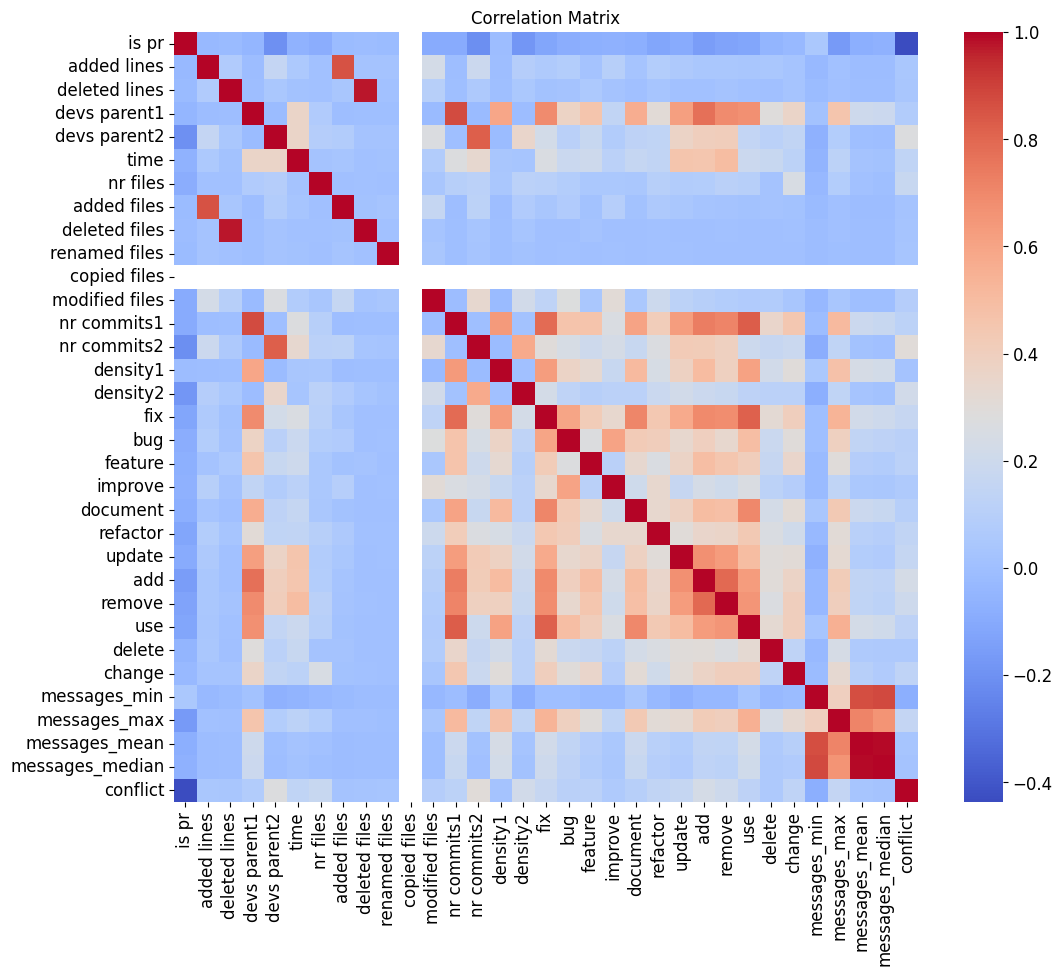

In [36]:
corr = df.corr(numeric_only=True)
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=False, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

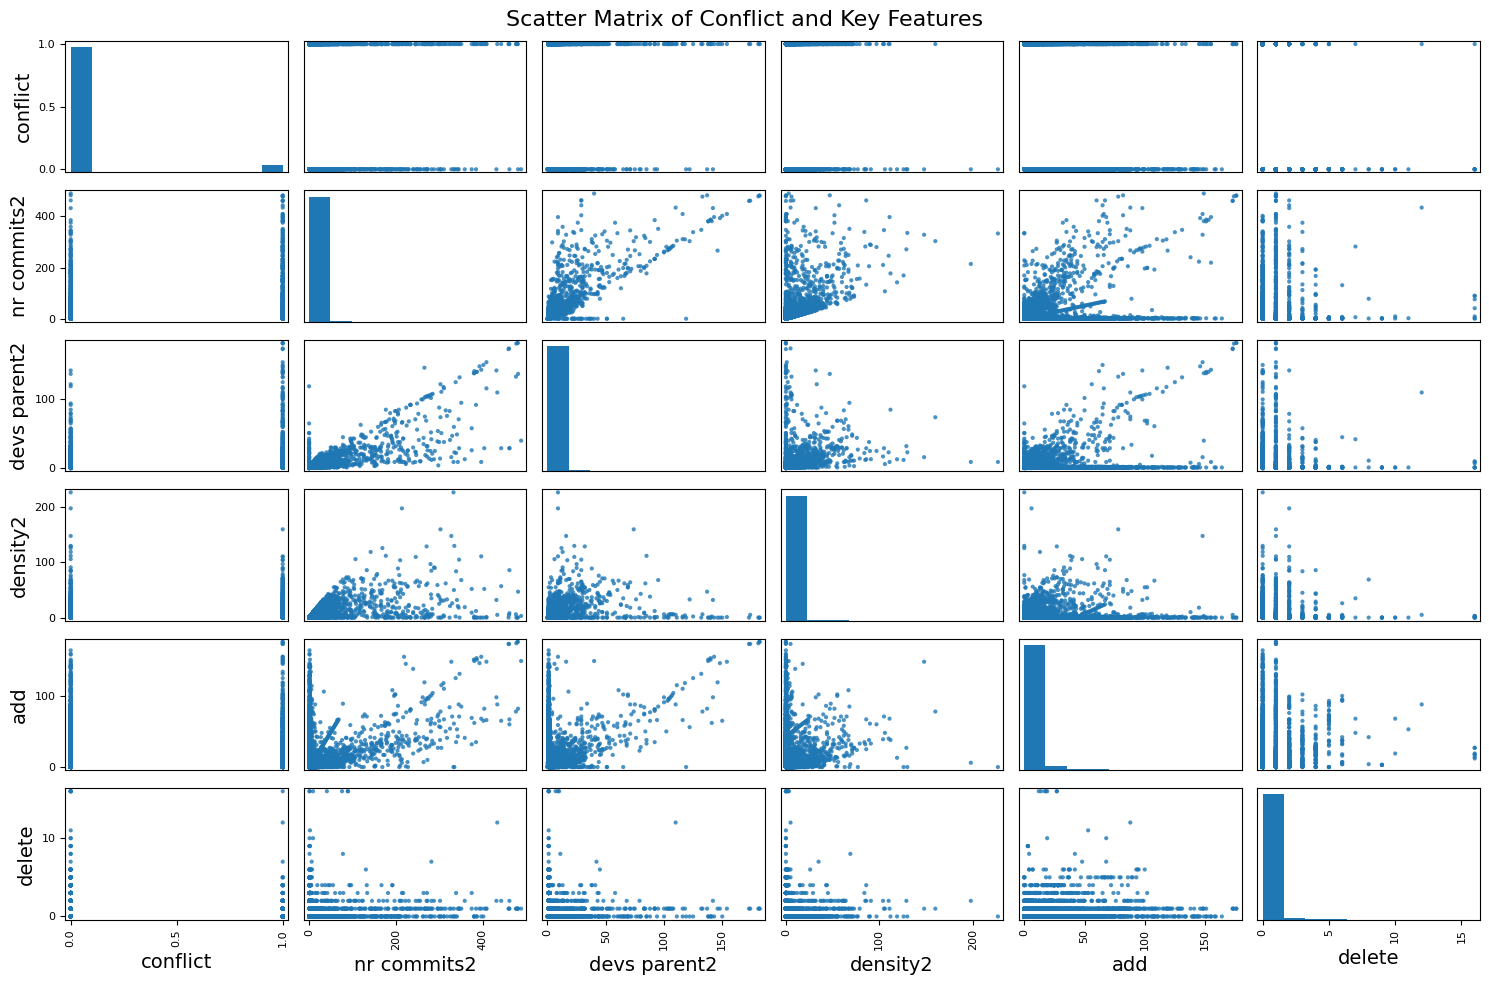

In [40]:

attributes = ["conflict", "nr commits2", "devs parent2", "density2", "add", "delete"]

selected_df = df[attributes]

scatter_matrix(selected_df, figsize=(15, 10), diagonal='hist', alpha=0.8)

plt.suptitle("Scatter Matrix of Conflict and Key Features", fontsize=16)
plt.tight_layout()
plt.show()


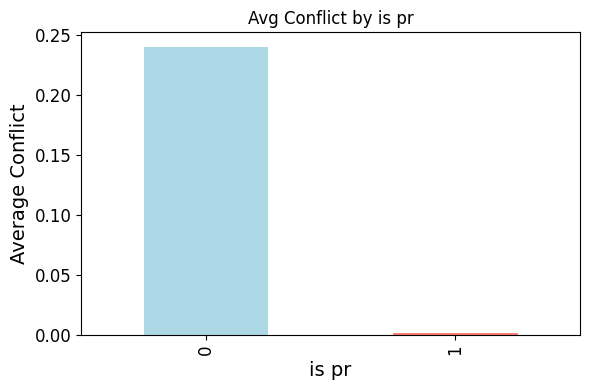

In [41]:
binary_features = ['is pr']

for feature in binary_features:
    plt.figure(figsize=(6, 4))
    avg_conflict = df.groupby(feature)['conflict'].mean()  
    avg_conflict.plot(kind='bar', color=['lightblue', 'salmon']) 
    plt.title(f"Avg Conflict by {feature}")
    plt.xlabel(feature)
    plt.ylabel("Average Conflict")
    plt.tight_layout()
    plt.show()

    